In [2]:
import torch
from torch.autograd import grad

# 1. 텐서 정의 및 초기화
x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

# 2. 수식 정의
z1 = x1 * x2  # z1 = x1 * x2
z2 = x3 * x4  # z2 = x3 * x4
f = z1 + z2   # f = z1 + z2 = (x1 * x2) + (x3 * x4)

# 3. autograd.grad로 기울기 계산
df_dx = grad(outputs=f, inputs=[x1, x2, x3, x4])



# 4. 결과 출력
print("Using torch.autograd.grad:")
print(f"Gradients : {df_dx}")
print(f"Gradient of x1 = {df_dx[0]}")
print(f"Gradient of x2 = {df_dx[1]}")
print(f"Gradient of x3 = {df_dx[2]}")
print(f"Gradient of x4 = {df_dx[3]}")


Using torch.autograd.grad:
Gradients : (tensor(3., dtype=torch.float16), tensor(2., dtype=torch.float16), tensor(4., dtype=torch.float16), tensor(1., dtype=torch.float16))
Gradient of x1 = 3.0
Gradient of x2 = 2.0
Gradient of x3 = 4.0
Gradient of x4 = 1.0


# 위의 코드 자동화

In [11]:
import torch
import torch.optim as optim

# 1. 텐서 정의 및 초기화
x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

# 2. 옵티마이저 설정 (기울기 초기화 기능 포함)
opt = optim.SGD(params=[x1, x2, x3, x4], lr=0.001)
opt.zero_grad()

# 3. 수식 정의 및 f.backward() 호출
z1 = x1 * x2
z2 = x3 * x4
f = z1 + z2 # = (x1 * x2) + (x3 * x4)

# 모든 변수의 기울기 자동 계산 및 저장
f.backward()
opt.step()


# 4. 결과 출력
print("Using .backward():")
print(f"Gradient of x1 = {x1.grad}")
print(f"Gradient of x2 = {x2.grad}")
print(f"Gradient of x3 = {x3.grad}")
print(f"Gradient of x4 = {x4.grad}")


Using .backward():
Gradient of x1 = 3.0
Gradient of x2 = 2.0
Gradient of x3 = 4.0
Gradient of x4 = 1.0




**두 방법의 차이점**

| 항목                        | `torch.autograd.grad`                            | `.backward()`                     |
|-----------------------------|--------------------------------------------------|------------------------------------|
| **기울기 계산 방식**         | 특정 입력 변수의 기울기 반환                    | 모든 `requires_grad=True` 변수의 기울기 저장 |
| **결과 저장 위치**           | 반환값(튜플)로 제공                             | 각 텐서의 `.grad` 속성에 저장      |
| **사용 편의성**              | 필요한 변수만 선택적으로 계산 가능               | 간단한 호출로 모든 변수 계산 가능  |
| **주요 사용 사례**           | 선택적 변수 기울기 계산, 반환값 활용이 필요한 경우 | 대부분의 딥러닝 모델 학습 과정    |
     
        
        

**정리**
- `torch.autograd.grad`는 특정 변수의 기울기만 필요하거나 반환값을 별도로 사용해야 할 때 적합합니다.
- `.backward()`는 일반적으로 모든 기울기를 계산하고 저장해야 하는 학습 과정에서 자주 사용됩니다.
- 두 방법 모두 PyTorch에서 기울기 계산의 핵심 기능을 제공하며, 용도에 따라 적절히 선택하여 사용할 수 있습니다.

In [13]:
### 초기화하지 않는 코드 예시
import torch
import torch.optim as optim

# 1. 텐서 정의 및 초기화
x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

# 2. 옵티마이저 설정
opt = optim.SGD(params=[x1, x2, x3, x4], lr=0.001)

# 반복하여 수식 계산 및 기울기 누적
for i in range(3):  # 3번 반복
    # 수식 정의
    z1 = x1 * x2  # z1 = x1 * x2
    z2 = x3 * x4  # z2 = x3 * x4
    f = z1 + z2   # f = z1 + z2 = (x1 * x2) + (x3 * x4)
    opt.zero_grad()

    # 역전파 수행
    f.backward()  # 기울기 계산 (기존 기울기에 누적)

    # 기울기 출력
    print(f"Iteration {i+1}:")
    print(f"Gradient of x1 = {x1.grad}")
    print(f"Gradient of x2 = {x2.grad}")
    print(f"Gradient of x3 = {x3.grad}")
    print(f"Gradient of x4 = {x4.grad}")
    print()

Iteration 1:
Gradient of x1 = 3.0
Gradient of x2 = 2.0
Gradient of x3 = 4.0
Gradient of x4 = 1.0

Iteration 2:
Gradient of x1 = 6.0
Gradient of x2 = 4.0
Gradient of x3 = 8.0
Gradient of x4 = 2.0

Iteration 3:
Gradient of x1 = 9.0
Gradient of x2 = 6.0
Gradient of x3 = 12.0
Gradient of x4 = 3.0



### `torch.nn` 모듈이란?

`torch.nn`은 PyTorch에서 **신경망을 구축**하는 데 필요한 다양한 구성 요소와 기능을 제공하는 핵심 모듈입니다. 이 모듈은 딥러닝 모델을 정의하고 학습시키는 데 매우 유용한 계층(layer), 손실 함수(loss function), 활성화 함수(activation function), 그리고 기타 신경망 관련 도구들을 포함하고 있습니다.

### 1. 주요 특징

1. **신경망 구축과 학습 지원**
    - 딥러닝 모델을 구축하고 학습하는 데 필요한 다양한 도구 제공
2. **다양한 구성 요소**
    - 신경망의 각 계층, 활성화 함수, 손실 함수, 정규화 기법 등을 손쉽게 사용 가능
3. **모듈 상속으로 사용자 정의 모델 설계 가능**
    - `torch.nn.Module`을 상속받아 **사용자 정의 모델**을 설계할 수 있음



### 2. 모델 구성 요소

다음은 설계할 모델의 구조입니다:

| index | 0 | 1 | 2 |
| --- | --- | --- | --- |
| 레이어 타입 | Linear | Linear | Linear |
| 입력 차원 | 8 | 4 | 6 |
| 출력 차원 | 4 | 6 | 3 |
| 활성화 함수 | ReLU | ReLU | - |



### 3. 모델 정의 : `nn.Module` 상속

모델 클래스를 정의할 때, 반드시 `torch.nn.Module`을 상속받아야 합니다.

이로써 PyTorch의 다양한 기능을 활용할 수 있으며, 계층 구조를 손쉽게 설계할 수 있습니다.

In [14]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear0 = nn.Linear(8, 4)
        self.linear1 = nn.Linear(4, 6)
        self.linear2 = nn.Linear(6, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.linear0(x))
        x = self.relu(self.linear1(x))
        y = self.linear2(x)
        return y


In [15]:
# 모델 생성 및 입력 텐서 준비

model = MyModel()

input_tensor = torch.randn(2, 8)  # 배치 크기: 2, 입력 차원: 8
result = model(input_tensor)
print(result)


tensor([[ 0.2188,  0.0652, -0.3179],
        [ 0.2015, -0.0031, -0.3826]], grad_fn=<AddmmBackward0>)


In [16]:
class MyModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = MyModel()  # 서브모듈로 MyModel 포함
        self.layer = nn.Linear(3, 4)

    def forward(self, x):
        x = self.block(x)  # MyModel 통과
        y = self.layer(x)  # 추가 레이어 통과
        return y


In [17]:
model2 = MyModel2()

input_tensor = torch.randn(2, 8)
result = model2(input_tensor)
print(result)


tensor([[ 0.7129, -0.3481,  0.1843,  0.1886],
        [ 0.7131, -0.4095,  0.2345,  0.2070]], grad_fn=<AddmmBackward0>)


In [18]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear0 = nn.Linear(8, 4)
        self.linear1 = nn.Linear(4, 6)
        self.linear2 = nn.Linear(6, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.linear0(x))
        x = self.relu(self.linear1(x))
        y = self.linear2(x)
        return y

In [19]:
model = nn.Sequential(
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Linear(4, 6),
    nn.ReLU(),
    nn.Linear(6, 3),
)

1. **병렬 레이어**
    - `input0`은 `Linear(4, 8)`로 처리 → 출력 크기: `[batch, 8]`
    - `input1`은 `Linear(6, 4)`로 처리 → 출력 크기: `[batch, 4]`
2. **컨캐터네이트**
    - `[batch, 8]` + `[batch, 4]` + `[batch, 2]` → `[batch, 14]`
3. **출력 레이어**
    - `[batch, 14]` → `Linear(14, 8)` → `output0` 크기: `[batch, 8]`
    - `[batch, 14]` → `Linear(14, 2)` → `output1` 크기: `[batch, 2]`

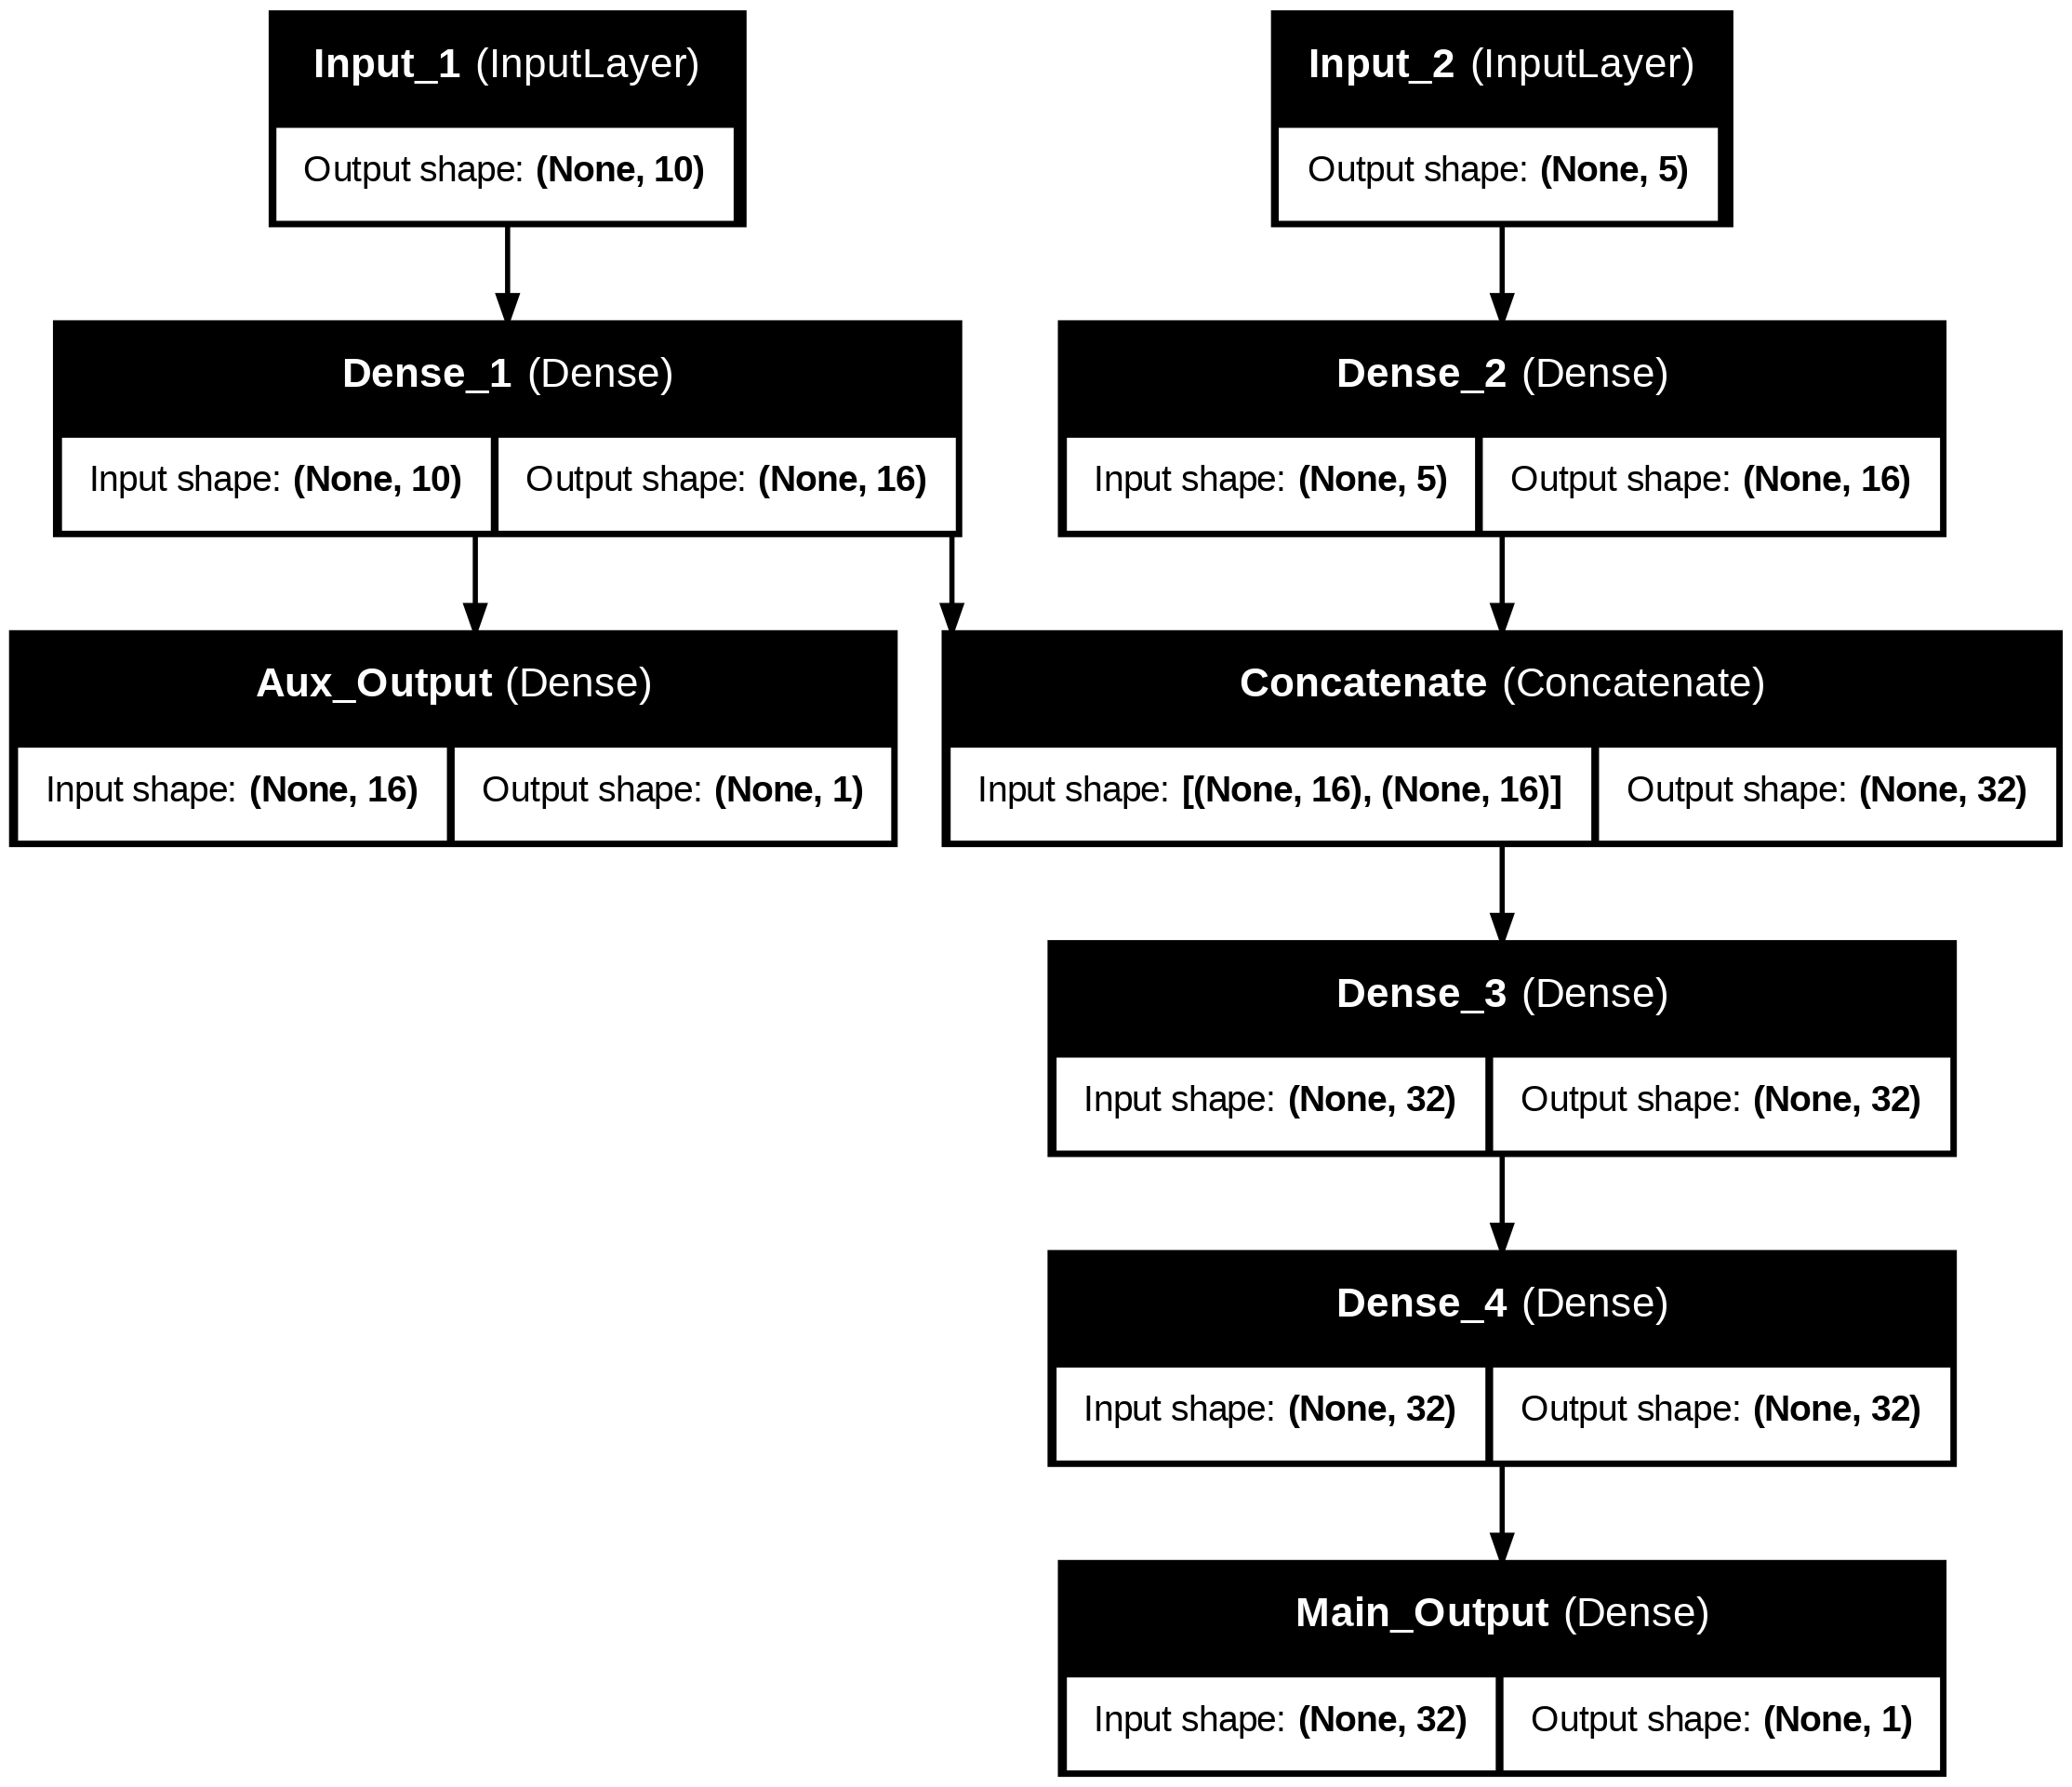

In [ ]:
# Input_1 (10차원) ───> Dense_1 (16차원) ────────────┐
#                                                   │
#                                                   ├─> Concatenate ──> Dense_3 (32차원) ──> Dense_4 (32차원) ──> Main_Output (1차원)
# Input_2 (5차원) ───> Dense_2 (16차원) ────────────┘
#                                                   └────────────> Aux_Output (1차원)

